In [2]:
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import pandas as pd
import datetime as dt


In [3]:
#read the csv data
df=pd.read_csv('Problem_C_Data_Wordle.csv')


In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Percent in,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
1,NaN,12/31/2022,560,manly,20380,1899,0,2,17,37,29,12,2
2,NaN,12/30/2022,559,molar,21204,1973,0,4,21,38,26,9,1
3,NaN,12/29/2022,558,havoc,20001,1919,0,2,16,38,30,12,2
4,NaN,12/28/2022,557,impel,20160,1937,0,3,21,40,25,9,1


In [7]:
#prepare the data for the plot
y=[]
for i in range(1,360):
    y.append(int(df.iloc[i,5]))
date=[dt.datetime.strptime(d,'%m/%d/%Y').date() for d in df.iloc[1:,1]]


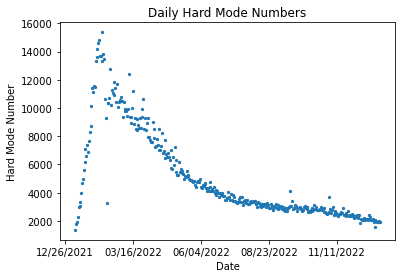

In [46]:
#plot the data
import matplotlib.dates as mdates
plt.figure()
plt.title('Daily Hard Mode Numbers')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=80))
plt.xlabel('Date')
plt.ylabel('Hard Mode Number')
K=359
x_range=np.linspace(1,K,num=K)
plt.scatter(date,y,s=5)

In [22]:
#calculate the ratio of hard mode number and total contest number
for i in range(1,360):
    df.iloc[i,4]=int(df.iloc[i,4])
    df.iloc[i,5]=int(df.iloc[i,5])
print(type(df.iloc[1,4]))
ratio=[]
for i in range(1,360):
    ratio.append(df.iloc[i,5]/df.iloc[i,4])

#create date index X for the further regression
x_range=np.linspace(1,K,num=K)
X=[int(i) for i in x_range]
arr_X=np.array(X)
arr_X=arr_X.reshape((-1,1))

<class 'int'>


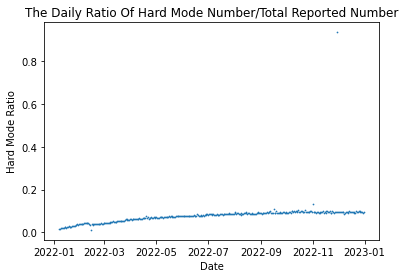

In [19]:
#plot the hard mode-total reported number ratio
plt.figure()
plt.title('The Daily Ratio Of Hard Mode Number/Total Reported Number')
plt.xlabel('Date')
plt.ylabel('Hard Mode Ratio')
plt.scatter(date,ratio,s=0.5)

In [43]:
#seperate the data set to training set and testing set 
arr_X_train=arr_X[100:209]#choose the first day150-260 to be the training set
arr_X_test=arr_X[:100]#choose the last 99 days to be the testing set
date_train=date[100:]
date_test=date[:100]
ratio_train=ratio[100:209]
ratio_test=ratio[:100]



In [44]:
#use SVM to regression the ratio and the daily number and make prediction
from sklearn.svm import SVR
lst_MSE_train=[]
lst_MSE_test=[]
for i in range(1,10):
    svm_poly_reg=SVR(kernel='rbf',degree=i)
    svm_poly_reg.fit(arr_X_train,ratio_train)
    ratio_pred_train=svm_poly_reg.predict(arr_X_train)
    lst_MSE_train.append(skl.metrics.mean_squared_error(ratio_train,ratio_pred_train))
    ratio_pred_test=svm_poly_reg.predict(arr_X_test)
    lst_MSE_test.append(skl.metrics.mean_squared_error(ratio_test,ratio_pred_test))

print(lst_MSE_train)
print(lst_MSE_test)
i=lst_MSE_test.index(min(lst_MSE_test))
print(i)
svm_poly_reg=SVR(kernel='poly',degree=3)
svm_poly_reg.fit(arr_X_train,ratio_train)
march_1=np.array([[-59]])
print(svm_poly_reg.predict(march_1))


[7.785868897610285e-05, 7.785868897610285e-05, 7.785868897610285e-05, 7.785868897610285e-05, 7.785868897610285e-05, 7.785868897610285e-05, 7.785868897610285e-05, 7.785868897610285e-05, 7.785868897610285e-05]
[0.007139684777857305, 0.007139684777857305, 0.007139684777857305, 0.007139684777857305, 0.007139684777857305, 0.007139684777857305, 0.007139684777857305, 0.007139684777857305, 0.007139684777857305]
0
[0.09298143]


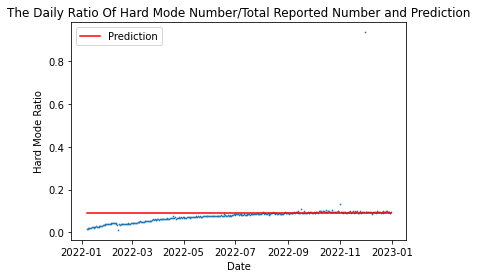

In [45]:
#plot the graph for ratio prediction
ratio_pred=svm_poly_reg.predict(arr_X)
plt.figure()
plt.title('The Daily Ratio Of Hard Mode Number/Total Reported Number and Prediction')
plt.xlabel('Date')
plt.ylabel('Hard Mode Ratio')
plt.scatter(date,ratio,s=0.5)
plt.plot(date,ratio_pred,color='red',label='Prediction')
plt.legend()
